## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer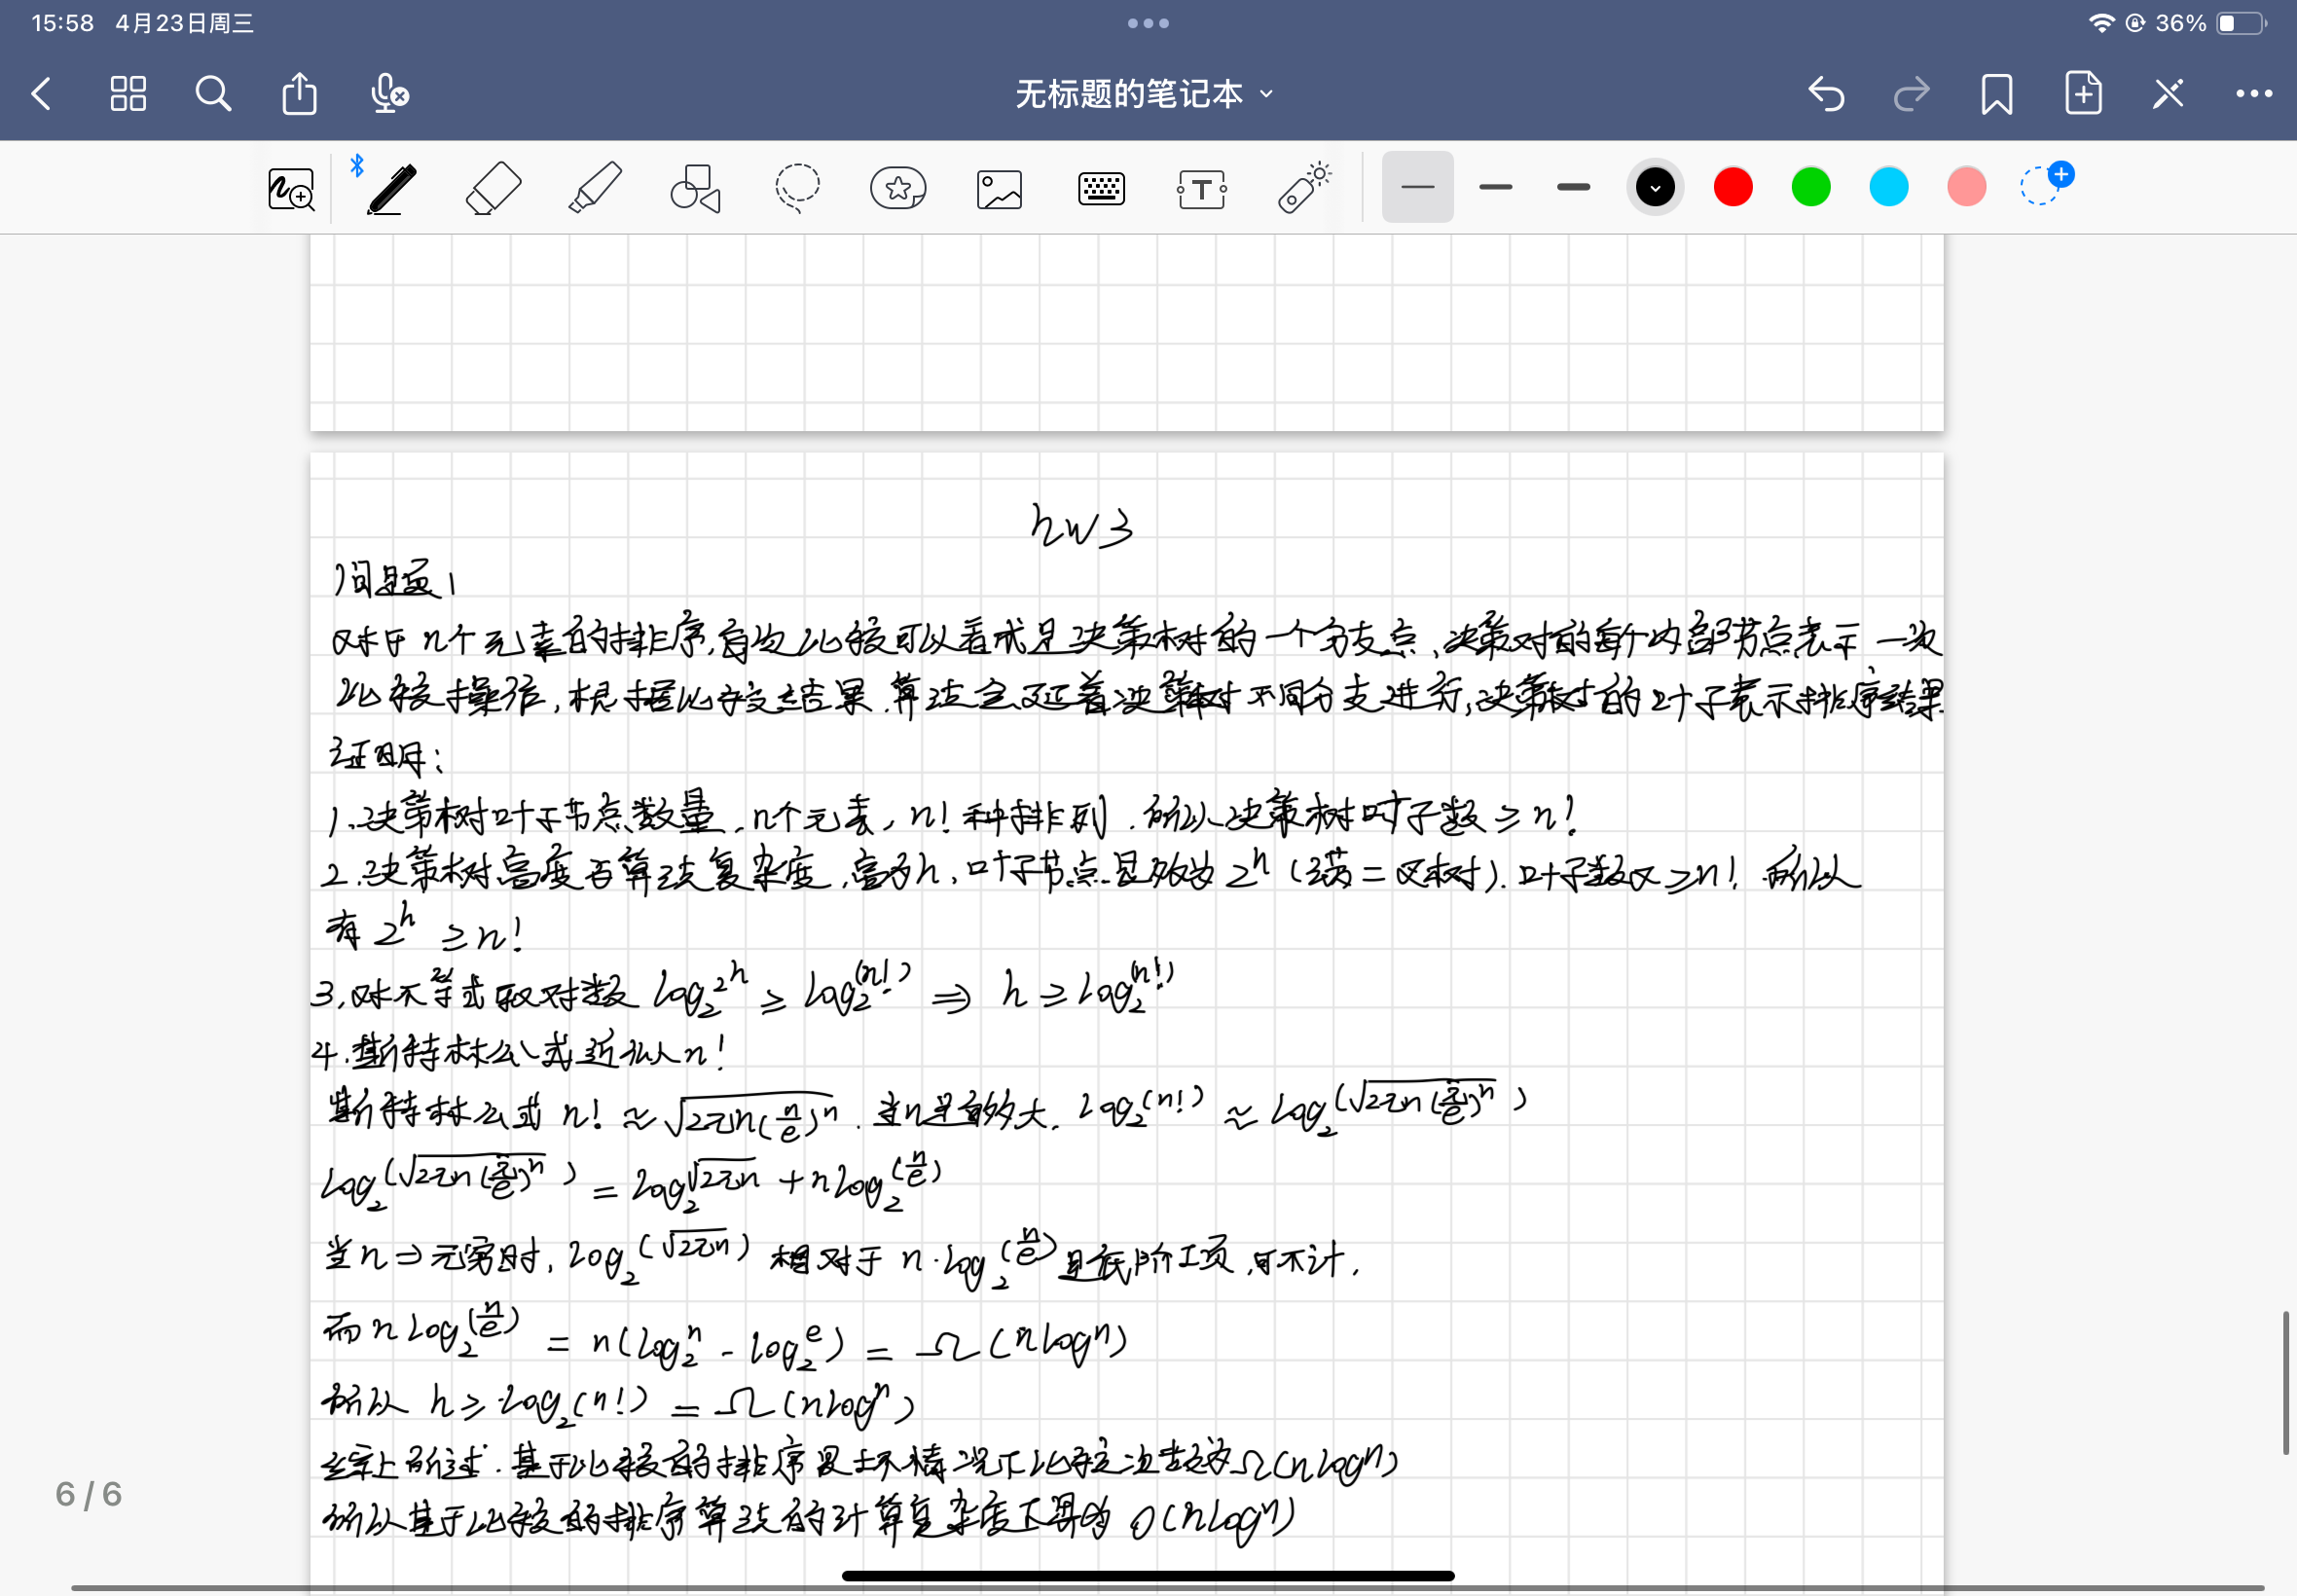

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：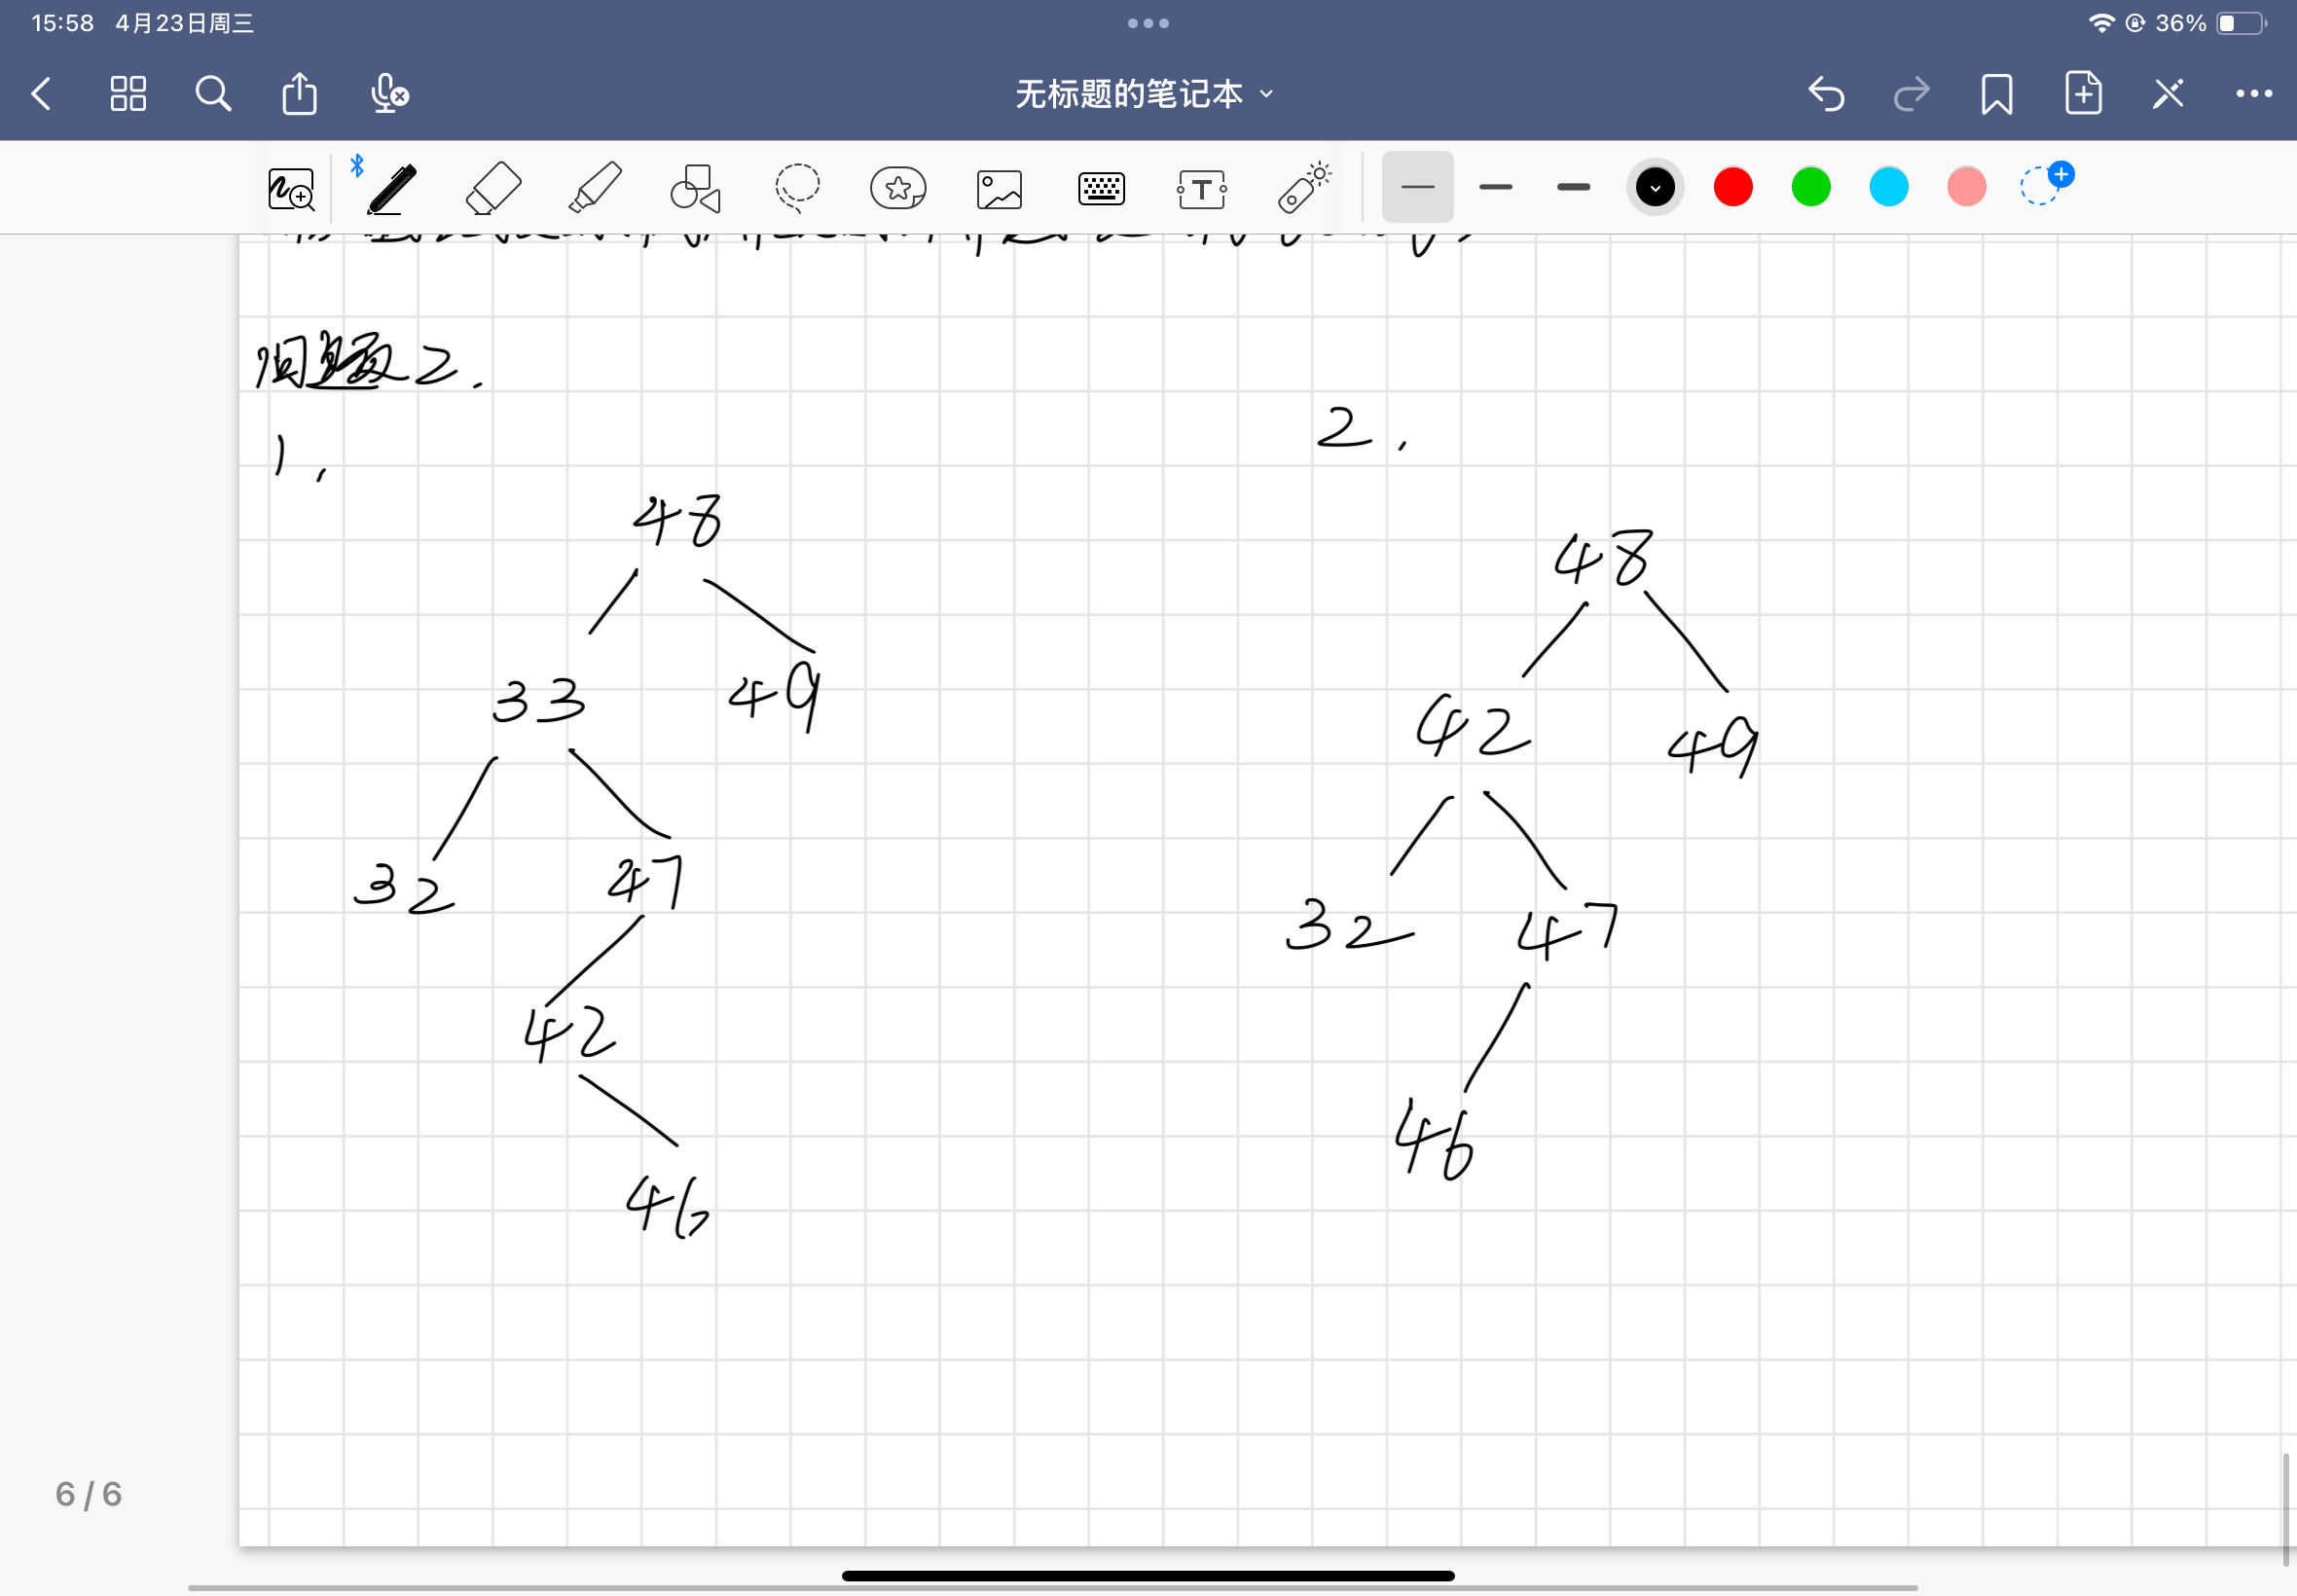

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：
### 算法设计思路
使用贪心算法解决课程教室分配问题，核心思路是将课程的开始时间和结束时间分别提取出来并排序，然后模拟课程的进行过程，通过记录同一时刻正在进行的课程数量来确定所需的最少教室数量，同时记录每间教室安排的课程。

具体步骤：
1. **数据处理**：将每门课程的开始时间和结束时间分别提取出来，并对它们进行排序。
2. **模拟过程**：使用两个指针分别遍历排序后的开始时间列表和结束时间列表。当遇到一个开始时间时，说明有一门新的课程开始，需要增加正在使用的教室数量；当遇到一个结束时间时，说明有一门课程结束，需要减少正在使用的教室数量。
3. **记录信息**：在模拟过程中，记录下最大的正在使用的教室数量，即为所需的最少教室数量。同时，使用一个列表来记录每间教室安排的课程。

### 复杂度分析
- **时间复杂度**：排序操作的时间复杂度为 $O(n log n)$，其中 $n$ 是课程的数量。遍历开始时间和结束时间列表的时间复杂度为 $O(n)$。因此，总的时间复杂度为 $O(n log n)$。
- **空间复杂度**：主要的空间开销是存储开始时间和结束时间列表，因此空间复杂度为 $O(n)$。

In [1]:
# code：
def allocate_classrooms(courses):
    # 提取所有课程的开始时间和结束时间
    start_times = sorted([course[0] for course in courses])
    end_times = sorted([course[1] for course in courses])

    # 初始化指针和计数器
    start_ptr = 0
    end_ptr = 0
    classrooms = 0
    max_classrooms = 0
    classroom_assignments = []

    while start_ptr < len(courses):
        if start_times[start_ptr] < end_times[end_ptr]:
            # 有新的课程开始，需要增加教室
            classrooms += 1
            if classrooms > len(classroom_assignments):
                classroom_assignments.append([])
            classroom_assignments[classrooms - 1].append(courses[start_ptr])
            start_ptr += 1
        else:
            # 有课程结束，减少教室
            classrooms -= 1
            end_ptr += 1
        max_classrooms = max(max_classrooms, classrooms)

    return max_classrooms, classroom_assignments


# 课程时间列表
courses = [(9.0, 12.5), (11.0, 14.0), (13.0, 14.5), (9.0, 10.5), (13.0, 14.5), (14.0, 16.5), (15.0, 16.5), (15.0, 16.5), (9.0, 10.5)]

# 分配教室
min_classrooms, assignments = allocate_classrooms(courses)

# 输出结果
print(f"最少需要 {min_classrooms} 间教室。")
for i, classroom in enumerate(assignments):
    print(f"教室 {i + 1} 安排的课程：{classroom}")
    

最少需要 3 间教室。
教室 1 安排的课程：[(9.0, 12.5)]
教室 2 安排的课程：[(11.0, 14.0), (9.0, 10.5), (13.0, 14.5), (15.0, 16.5)]
教室 3 安排的课程：[(13.0, 14.5), (14.0, 16.5), (15.0, 16.5), (9.0, 10.5)]


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：
### 算法设计思路
爬楼梯问题可以使用动态规划的思想来解决。我们可以定义一个状态数组 `dp`，其中 `dp[i]` 表示爬上第 `i` 阶楼梯的方法数。

对于第 `i` 阶楼梯，到达它有两种方式：
1. 从第 `i - 1` 阶楼梯爬一阶到达。
2. 从第 `i - 2` 阶楼梯爬两阶到达。

所以，爬上第 `i` 阶楼梯的方法数等于爬上第 `i - 1` 阶楼梯的方法数加上爬上第 `i - 2` 阶楼梯的方法数，即状态转移方程为：`dp[i] = dp[i - 1] + dp[i - 2]`。

初始状态：
- 当 `i = 0` 时，站在第 0 阶楼梯，只有一种方法（即不爬），所以 `dp[0] = 1`。
- 当 `i = 1` 时，爬上第 1 阶楼梯只有一种方法（爬一阶），所以 `dp[1] = 1`。

### 时间复杂度分析
我们需要填充长度为 `n + 1` 的 `dp` 数组，对于每个元素的计算只需要常数时间，所以总的时间复杂度为 $O(n)$。

In [2]:
# add your code here
def climb_stairs(n):
    if n == 0:
        return 1
    # 初始化 dp 数组
    dp = [0] * (n + 1)
    dp[0] = 1
    dp[1] = 1
    # 填充 dp 数组
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]

# 测试示例
n = 5
print(f"爬上 {n} 阶楼梯的方法数为: {climb_stairs(n)}")
    
# your algorithm time complexity is: O(n)

爬上 5 阶楼梯的方法数为: 8


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：
### 算法设计思路
题目是一个动态规划问题。核心思想是通过构建一个二维数组 `dp` 来记录不同容量下选择不同物品组合所能获得的最大价值。

设 `dp[i][w]` 表示在前 `i` 个物品中选择，背包容量为 `w` 时所能获得的最大价值。对于每个物品 `i`，有两种选择：
1. **不选择该物品**：那么最大价值就等于在前 `i - 1` 个物品中选择，背包容量为 `w` 时的最大价值，即 `dp[i][w] = dp[i - 1][w]`。
2. **选择该物品**：前提是当前背包容量 `w` 要大于等于该物品的重量 `weights[i - 1]`，此时最大价值为在前 `i - 1` 个物品中选择，背包容量为 `w - weights[i - 1]` 时的最大价值加上该物品的价值 `values[i - 1]`，即 `dp[i][w] = dp[i - 1][w - weights[i - 1]] + values[i - 1]`。

综合这两种情况，状态转移方程为：

dp[i][w] = 
\begin{cases}
dp[i - 1][w] & \text{if } w < weights[i - 1] \\
\max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1]) & \text{if } w \geq weights[i - 1]
\end{cases}


### 时间复杂度分析
需要填充一个大小为 `(n + 1) * (W + 1)` 的二维数组 `dp`，其中 `n` 是物品的数量，`W` 是背包的最大容量。填充每个元素的时间复杂度为 $O(1)$，所以总的时间复杂度为 $O(nW)$。


In [3]:
# add your code here
def knapsack(items, capacity):
    n = len(items)
    # 提取重量和价值列表
    weights = [item[0] for item in items]
    values = [item[1] for item in items]
    # 初始化 dp 数组
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    # 填充 dp 数组
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] > w:
                dp[i][w] = dp[i - 1][w]
            else:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
    # 返回最大价值
    return dp[n][capacity]

# 物品信息
items = [(5, 10), (4, 40), (6, 30), (3, 50)]
# 背包容量
capacity = 9
# 计算最大价值
max_value = knapsack(items, capacity)
print(f"使用最大承重为 {capacity} 的小推车装大理石的最大价值为: {max_value}")
    
# your algorithm time complexity is:O(nW)

使用最大承重为 9 的小推车装大理石的最大价值为: 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：
### 算法设计思路

#### ：动态规划
为了计算每个位置能接的雨水量，需要知道该位置左边的最大高度和右边的最大高度。动态规划的核心思路是分别计算出每个位置左边的最大高度和右边的最大高度，然后根据左右最大高度的较小值与当前位置柱子高度的差值来计算该位置能接的雨水量。

具体步骤如下：
1. **计算左边最大高度数组**：从左到右遍历柱子高度数组 `height`，记录每个位置左边的最大高度，存储在 `left_max` 数组中。
2. **计算右边最大高度数组**：从右到左遍历柱子高度数组 `height`，记录每个位置右边的最大高度，存储在 `right_max` 数组中。
3. **计算每个位置的雨水量**：遍历柱子高度数组 `height`，对于每个位置 `i`，该位置能接的雨水量为 `min(left_max[i], right_max[i]) - height[i]`。
4. **求和**：将每个位置的雨水量相加，得到总的雨水量。


### 复杂度分析

#### 动态规划
- **时间复杂度**：需要遍历数组三次，每次遍历的时间复杂度为 $O(n)$，所以总的时间复杂度为 $O(n)$。
- **空间复杂度**：需要使用两个额外的数组 `left_max` 和 `right_max` 来记录左右最大高度，空间复杂度为 $O(n)$。

In [4]:
# add your code here
def trap(height):
    n = len(height)
    if n == 0:
        return 0
    # 初始化 left_max 数组，用于记录每个位置左侧的最大高度
    left_max = [0] * n
    # 初始化 right_max 数组，用于记录每个位置右侧的最大高度
    right_max = [0] * n
    # 第一个位置左侧最大高度就是它自身高度
    left_max[0] = height[0]
    # 从左到右遍历，计算每个位置左侧的最大高度
    for i in range(1, n):
        left_max[i] = max(left_max[i - 1], height[i])
    # 最后一个位置右侧最大高度就是它自身高度
    right_max[n - 1] = height[n - 1]
    # 从右到左遍历，计算每个位置右侧的最大高度
    for i in range(n - 2, -1, -1):
        right_max[i] = max(right_max[i + 1], height[i])
    # 初始化结果变量，用于存储总的雨水量
    result = 0
    # 遍历每个位置，计算该位置能接的雨水量并累加到结果中
    for i in range(n):
        result += min(left_max[i], right_max[i]) - height[i]
    return result


# 测试示例
height = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
print(f"能接的雨水量为: {trap(height)}")
    
    
# your algorithm time complexity is:O（n）

能接的雨水量为: 6


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：
### 算法设计思路
本题可将其转化为 0 - 1 背包问题来解决。在 0 - 1 背包问题中，每个物品要么被选择，要么不被选择，对应到股票投资场景，就是每只股票要么被投资，要么不被投资。

设 `dp[i][w]` 表示考虑前 `i` 只股票，预算为 `w` 时能获得的最大预期收益。对于每只股票 `i`，有两种情况：
1. **不投资该股票**：那么最大预期收益就等于考虑前 `i - 1` 只股票，预算为 `w` 时的最大预期收益，即 `dp[i][w] = dp[i - 1][w]`。
2. **投资该股票**：前提是当前预算 `w` 要大于等于该股票的投资金额 `costs[i - 1]`，此时最大预期收益为考虑前 `i - 1` 只股票，预算为 `w - costs[i - 1]` 时的最大预期收益加上该股票的预期收益 `returns[i - 1]`，即 `dp[i][w] = dp[i - 1][w - costs[i - 1]] + returns[i - 1]`。

综合这两种情况，状态转移方程为：
\[
dp[i][w] = 
\begin{cases}
dp[i - 1][w] & \text{if } w < costs[i - 1] \\
\max(dp[i - 1][w], dp[i - 1][w - costs[i - 1]] + returns[i - 1]) & \text{if } w \geq costs[i - 1]
\end{cases}
\]

### 时间复杂度分析
需要填充一个大小为 `(n + 1) * (budget + 1)` 的二维数组 `dp`，其中 `n` 是股票的数量，`budget` 是预算。填充每个元素的时间复杂度为 $O(1)$，所以总的时间复杂度为 $O(n \times budget)$。

In [5]:
# add your code here
def stock_portfolio_optimization(costs, returns, budget):
    n = len(costs)
    # 初始化 dp 数组
    dp = [[0 for _ in range(budget + 1)] for _ in range(n + 1)]
    # 记录选择情况
    choices = [[False for _ in range(budget + 1)] for _ in range(n + 1)]

    # 填充 dp 数组
    for i in range(1, n + 1):
        for w in range(1, budget + 1):
            if costs[i - 1] > w:
                dp[i][w] = dp[i - 1][w]
            else:
                not_choose = dp[i - 1][w]
                choose = dp[i - 1][w - costs[i - 1]] + returns[i - 1]
                if choose > not_choose:
                    dp[i][w] = choose
                    choices[i][w] = True
                else:
                    dp[i][w] = not_choose

    # 回溯找出选择的股票
    selected_stocks = []
    w = budget
    investment_amounts = [0] * n  # 用于记录每只股票的投资金额
    for i in range(n, 0, -1):
        if choices[i][w]:
            selected_stocks.append(i - 1)
            investment_amounts[i - 1] = costs[i - 1]
            w -= costs[i - 1]

    # 返回最大预期收益、选择的股票和每只股票的投资金额
    return dp[n][budget], selected_stocks, investment_amounts

# 股票信息
costs = [5000, 3000, 2000]
returns = [0.1 * 5000, 0.08 * 3000, 0.12 * 2000]
# 预算
budget = 8000

# 计算最优投资方案
max_return, selected_stocks, investment_amounts = stock_portfolio_optimization(costs, returns, budget)
print(f"最大预期收益为: {max_return} 美元")
print("选择的股票为:", [chr(65 + i) for i in selected_stocks])
print("每只股票的投资金额为:", investment_amounts)
# your algorithm time complexity is:O(n×budget)

最大预期收益为: 740.0 美元
选择的股票为: ['B', 'A']
每只股票的投资金额为: [5000, 3000, 0]


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：
### 算法设计思路
对于二叉搜索树（BST），中序遍历的结果是一个升序序列。当有两个节点的值被错误交换时，在中序遍历过程中会出现逆序对。

我们可以通过中序遍历找到这两个错误交换的节点：
1. 初始化两个指针 `first` 和 `second` 为 `None`，用于记录两个错误交换的节点。
2. 初始化一个指针 `prev` 为 `None`，用于记录中序遍历时的前一个节点。
3. 进行中序遍历，对于每个节点：
    - 如果 `prev` 存在且 `prev.val > node.val`，说明找到了一个逆序对。
    - 如果 `first` 为 `None`，则将 `first` 指向 `prev`，`second` 指向 `node`。
    - 如果 `first` 不为 `None`，则将 `second` 指向 `node`。
4. 遍历结束后，交换 `first` 和 `second` 节点的值，即可恢复二叉搜索树。

### 时间复杂度分析
中序遍历需要访问二叉树的每个节点一次，时间复杂度为 $O(n)$，其中 $n$ 是二叉树的节点数。交换两个节点的值的操作时间复杂度为 $O(1)$。因此，总的时间复杂度为 $O(n)$。

In [6]:
# add your code here
# 定义二叉树节点类
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        # 节点的值
        self.val = val
        # 左子节点
        self.left = left
        # 右子节点
        self.right = right

def recoverTree(root):
    # 初始化第一个错误节点
    first = None
    # 初始化第二个错误节点
    second = None
    # 初始化前一个节点，用于中序遍历时比较
    prev = None

    def inorder_traversal(node):
        nonlocal first, second, prev
        if node:
            # 递归遍历左子树
            inorder_traversal(node.left)
            # 如果前一个节点存在，并且前一个节点的值大于当前节点的值，说明出现了逆序
            if prev and prev.val > node.val:
                # 如果 first 还未被赋值，将 first 指向 prev
                if not first:
                    first = prev
                # 无论 first 是否被赋值，second 都指向当前节点
                second = node
            # 更新前一个节点为当前节点
            prev = node
            # 递归遍历右子树
            inorder_traversal(node.right)

    # 调用中序遍历函数
    inorder_traversal(root)
    # 交换两个错误节点的值
    first.val, second.val = second.val, first.val
    # 返回恢复后的二叉搜索树的根节点
    return root
    
# your algorithm time complexity is:O（n）

## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：
### 算法设计思路
本题可使用深度优先搜索（DFS）来解决。核心思路是从根节点开始，沿着每条路径向下遍历，同时计算当前路径所代表的数字。当到达叶节点时，将该路径所代表的数字累加到总和中。

具体步骤如下：
1. **递归遍历**：从根节点开始，递归地遍历二叉树的每个节点。
2. **计算路径数字**：在遍历过程中，将当前节点的值乘以 10 并加上之前路径所代表的数字，得到当前路径的数字。
3. **处理叶节点**：当到达叶节点（即没有左右子节点）时，将当前路径的数字累加到总和中。
4. **返回结果**：遍历完所有路径后，返回总和。

### 时间复杂度分析
需要遍历二叉树的每个节点一次，因此时间复杂度为 $O(n)$，其中 $n$ 是二叉树的节点数。

In [7]:
# add your code here
# 定义二叉树节点类
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def sumNumbers(root):
    def dfs(node, current_sum):
        if not node:
            return 0
        # 计算当前路径的数字
        current_sum = current_sum * 10 + node.val
        # 如果是叶节点，返回当前路径的数字
        if not node.left and not node.right:
            return current_sum
        # 递归计算左子树和右子树的路径数字之和
        return dfs(node.left, current_sum) + dfs(node.right, current_sum)

    return dfs(root, 0)

# 示例用法
# 构建示例二叉树 [1,2,3]
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
print(sumNumbers(root1))  

# 构建示例二叉树 [4,9,0,5,1]
root2 = TreeNode(4)
root2.left = TreeNode(9)
root2.right = TreeNode(0)
root2.left.left = TreeNode(5)
root2.left.right = TreeNode(1)
print(sumNumbers(root2))  
    
# your algorithm time complexity is:

25
1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea:
### 算法设计思路

#### 递归方法
判断二叉树是否轴对称，可将问题转化为判断根节点的左右子树是否对称。对于左右子树的两个节点 `left` 和 `right`，要满足以下条件才对称：
1. 两个节点的值相等。
2. `left` 的左子树和 `right` 的右子树对称。
3. `left` 的右子树和 `right` 的左子树对称。

基于此，可编写递归函数进行判断。

#### 迭代方法
迭代方法可使用队列来辅助实现。首先将根节点的左右子节点加入队列，然后每次从队列中取出两个节点进行比较，若值相等，则将 `left` 的左子节点和 `right` 的右子节点、`left` 的右子节点和 `right` 的左子节点依次加入队列，重复此过程，直到队列为空。若过程中出现不满足对称条件的情况，则返回 `False`。

### 时间复杂度分析
无论是递归方法还是迭代方法，都需要遍历二叉树的每个节点，因此时间复杂度均为 $O(n)$，其中 $n$ 是二叉树的节点数。


    

In [8]:
# add your code here
# 定义二叉树节点类
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# 递归方法
def isSymmetricRecursive(root):
    def checkSymmetry(left, right):
        # 如果两个节点都为空，说明对称
        if not left and not right:
            return True
        # 如果只有一个节点为空，说明不对称
        if not left or not right:
            return False
        # 检查当前节点值是否相等，以及左子树和右子树是否对称
        return left.val == right.val and checkSymmetry(left.left, right.right) and checkSymmetry(left.right, right.left)
    # 从根节点的左右子树开始检查
    return checkSymmetry(root.left, root.right) if root else True

# 迭代方法
from collections import deque
def isSymmetricIterative(root):
    if not root:
        return True
    # 初始化队列，将根节点的左右子节点加入队列
    queue = deque([root.left, root.right])
    while queue:
        # 取出队列中的两个节点
        left = queue.popleft()
        right = queue.popleft()
        # 如果两个节点都为空，继续下一轮循环
        if not left and not right:
            continue
        # 如果只有一个节点为空，或者节点值不相等，说明不对称
        if not left or not right or left.val != right.val:
            return False
        # 将 left 的左子节点和 right 的右子节点加入队列
        queue.append(left.left)
        queue.append(right.right)
        # 将 left 的右子节点和 right 的左子节点加入队列
        queue.append(left.right)
        queue.append(right.left)
    return True

# 示例用法
# 构建示例二叉树 [1,2,2,3,4,4,3]
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(2)
root1.left.left = TreeNode(3)
root1.left.right = TreeNode(4)
root1.right.left = TreeNode(4)
root1.right.right = TreeNode(3)
print("递归方法判断结果:", isSymmetricRecursive(root1))
print("迭代方法判断结果:", isSymmetricIterative(root1))

# 构建示例二叉树 [1,2,2,null,3,null,3]
root2 = TreeNode(1)
root2.left = TreeNode(2)
root2.right = TreeNode(2)
root2.left.right = TreeNode(3)
root2.right.right = TreeNode(3)
print("递归方法判断结果:", isSymmetricRecursive(root2))
print("迭代方法判断结果:", isSymmetricIterative(root2))
    
# your algorithm time complexity is: O(n)

递归方法判断结果: True
迭代方法判断结果: True
递归方法判断结果: False
迭代方法判断结果: False


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:
### 算法设计思路
本题可使用深度优先搜索（DFS）或广度优先搜索（BFS）来计算二维网格中岛屿的数量。核心思路是遍历整个网格，当遇到陆地（值为 `'1'`）时，将该陆地及其相连的所有陆地标记为已访问（可将其值置为 `'0'`），并将岛屿数量加 1。

#### 深度优先搜索（DFS）
- 从网格的左上角开始遍历，当遇到值为 `'1'` 的单元格时，调用 DFS 函数。
- 在 DFS 函数中，将当前单元格标记为已访问（置为 `'0'`），然后递归地对其上下左右四个相邻单元格进行 DFS 操作，前提是相邻单元格在网格范围内且值为 `'1'`。
- 每完成一次 DFS 调用，说明找到了一个完整的岛屿，岛屿数量加 1。

#### 广度优先搜索（BFS）
- 同样从网格的左上角开始遍历，当遇到值为 `'1'` 的单元格时，使用队列来进行 BFS。
- 将当前单元格加入队列，并将其标记为已访问（置为 `'0'`）。
- 当队列不为空时，取出队首元素，检查其上下左右四个相邻单元格，若相邻单元格在网格范围内且值为 `'1'`，则将其加入队列并标记为已访问。
- 每完成一次 BFS 过程，说明找到了一个完整的岛屿，岛屿数量加 1。

### 复杂度分析
- **时间复杂度**：无论是 DFS 还是 BFS，都需要遍历网格中的每个单元格一次，因此时间复杂度为 $O(m \times n)$，其中 $m$ 是网格的行数，$n$ 是网格的列数。
- **空间复杂度**：
    - **DFS**：最坏情况下，递归的深度可能达到网格的大小，因此空间复杂度为 $O(m \times n)$。
    - **BFS**：最坏情况下，队列中可能存储网格中的所有单元格，因此空间复杂度也为 $O(m \times n)$。

In [9]:
# add your code here DFS
def numIslands(grid):
    if not grid or not grid[0]:
        return 0
    rows, cols = len(grid), len(grid[0])
    count = 0

    def dfs(r, c):
        # 检查坐标是否越界或当前单元格是否为水
        if r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c] == '0':
            return
        # 将当前单元格标记为已访问
        grid[r][c] = '0'
        # 对上下左右四个相邻单元格进行 DFS
        dfs(r + 1, c)
        dfs(r - 1, c)
        dfs(r, c + 1)
        dfs(r, c - 1)

    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == '1':
                # 遇到陆地，进行 DFS 并增加岛屿数量
                dfs(r, c)
                count += 1
    return count

# 测试示例
grid1 = [
    ["1", "1", "1", "1", "0"],
    ["1", "1", "0", "1", "0"],
    ["1", "1", "0", "0", "0"],
    ["0", "0", "0", "0", "0"]
]
print(f"岛屿数量: {numIslands(grid1)}")

grid2 = [
    ["1", "1", "0", "0", "0"],
    ["1", "1", "0", "0", "0"],
    ["0", "0", "1", "0", "0"],
    ["0", "0", "0", "1", "1"]
]
print(f"岛屿数量: {numIslands(grid2)}")
    
# your algorithm time complexity is:

岛屿数量: 1
岛屿数量: 3
